# Practical session: Exploratory Data Analysis (EDA)

The main purpose of EDA is to help look at data before making any assumptions. It can help to:

- identify obvious errors,
- understand patterns,
- detect outliers or anomalous events, 
- find relations among the variables.


In [90]:
## Importing Libraries 

# Base libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import pickle

# Visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Default options 
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Dataset

The Pima Indians Diabetes dataset is part of a large database maintained at the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. It is used for a diabetes study conducted on Pima Indian women aged 21 and over living in Phoenix, the fifth largest city in the state of Arizona, USA. 

The dataset consists of **768 observations** and 8 numerical independent variables. The target variable is indicated as `outcome`; `1` represents a *positive diabetes test result*, and `0` represents a *negative result*.

### Features 

- `Pregnancies`: Number of pregnancies
- `Glucose`: Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)
- `BloodPressure`: Diastolic Blood Pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour Serum insulin (uh/ml)
- `BMI`: Body mass index [weight in kg/(Height in m)]
- `DiabetesPedigreeFunction`: A function that calculates the likelihood of having diabetes based on our family members.
- `Age`: Age (years)
- `Outcome`: Information about whether the individual has diabetes or not. Affected by the disease (`1`) or not (`0`)

In [91]:
# Set the data path 
DATA_PATH="../data/diabetes/"

# read the datafile
df = pd.read_csv(DATA_PATH + "diabetes.csv")

Quick checking on the above info

In [54]:
## Quick exploration
# Dataset dimensions
print("dataset:", df.shape[0],"rows,", df.shape[1], "columns")
df.shape

dataset: 768 rows, 9 columns


(768, 9)

In [55]:
## Quick exploration
df.head(10)
#df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
5,5,116,74,0,0,25.60,0.20,30,0
6,3,78,50,32,88,31.00,0.25,26,1
7,10,115,0,0,0,35.30,0.13,29,0
8,2,197,70,45,543,30.50,0.16,53,1
9,8,125,96,0,0,0.00,0.23,54,1


## Concepts

### Variables

<img width="300" alt="image" src="https://sciencenotes.org/wp-content/uploads/2020/05/IndependentDependent-1024x683.png">

#### Independent Variable 

*aka:* `Feature, Independent, Input, Column, Predictor, Explanatory`

Other variables that are assumed to influence the dependent variable.

#### Dependent Variable

*aka:* `Target, Dependent, Output, Response`

#### Variables types

- `Numeric Variables`: temperature, age, square footage, price, etc.
- `Categorical Variables`: (Nominal, Ordinal): gender (nominal), survival status (nominal), football teams (nominal), educational level (ordinal)

In [56]:
# variables info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Descriptives   


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [58]:
# Check for null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [59]:
# Check for duplicates 
df.duplicated().any()

False

## Target variable

In [60]:
# Dimensions (shape)
print("positive: ", df[df.Outcome == 1].shape)
print("negative: ", df[df.Outcome == 0].shape)

positive:  (268, 9)
negative:  (500, 9)


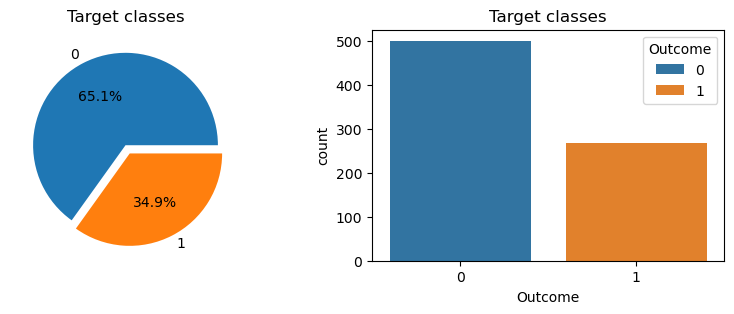

In [61]:
fig,axes = plt.subplots(1,2,figsize=(10,3))
df['Outcome'].value_counts().plot(kind='pie', autopct='%.1f%%', explode=[0,0.1], ax=axes[0]).set_title('Target classes');
axes[0].set_title('Target classes')
axes[0].set_ylabel('')
sns.countplot(data = df ,x='Outcome',hue='Outcome' , ax=axes[1])
axes[1].set_title('Target classes')
plt.show()

## Feature analysis

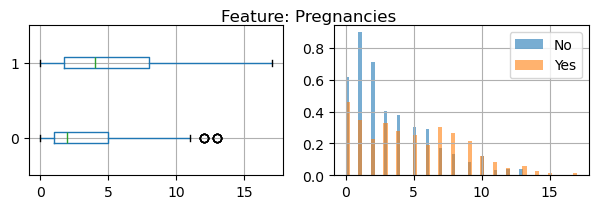

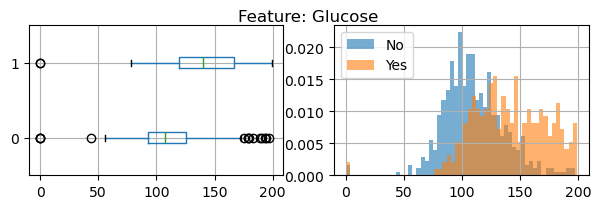

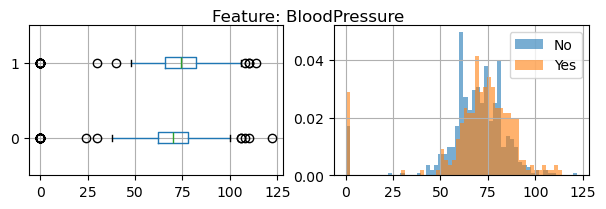

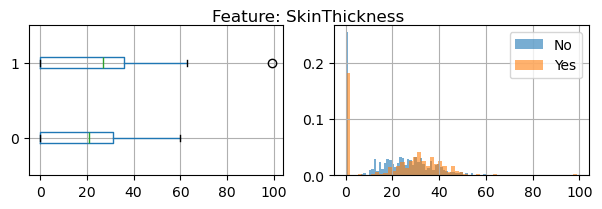

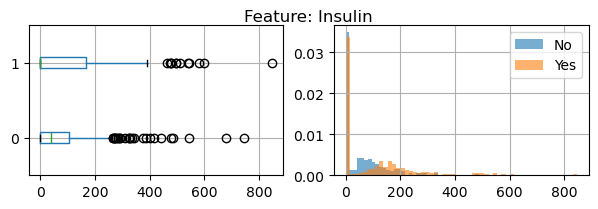

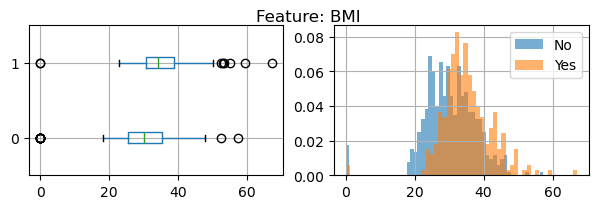

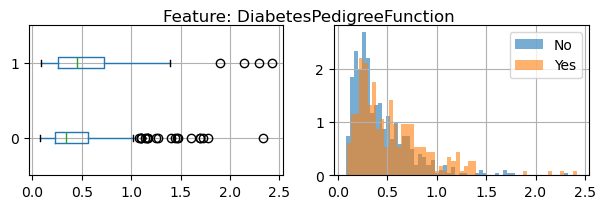

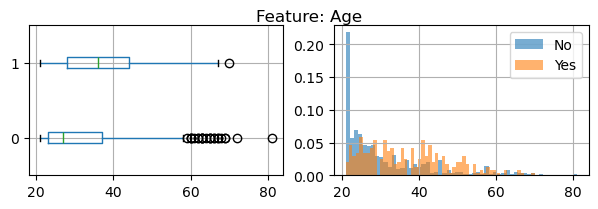

In [62]:
labels = ["No", "Yes"]
# Function to print histogram of numerical features 
def plot_feature(dataframe, col_name):
    """Plot the given feature by class (negative and positive)
    Args:
        dataframe (dataframe): data source as dataframe
        col_name (numeric): colunm name (feature)
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 2))
    dataframe.groupby('Outcome')[col_name].hist(bins=55, alpha=.6, density=True, ax=axes[1])
    axes[1].legend(labels)
    dataframe.boxplot(col_name, by="Outcome", ax=axes[0], vert=False)
    axes[0].set_title("")
    axes[0].set_ylabel("")
    fig.suptitle('Feature: ' + col_name)
    plt.show()

# Excluding the target variable
cols = [col for col in df.columns if "Outcome" not in col]

for feature in cols:
    plot_feature(df,feature)

## Correlation between features

- `POSITIVE CORRELATION`: If an increase in feature A leads to increase in feature B, then they are **positively correlated**. A value 1 means perfect positive correlation.
- `NEGATIVE CORRELATION`: If an increase in feature A leads to decrease in feature B, then they are **negatively correlated**. A value -1 means perfect negative correlation.

Attention: Lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

*Note: Only numeric features*

<Axes: >

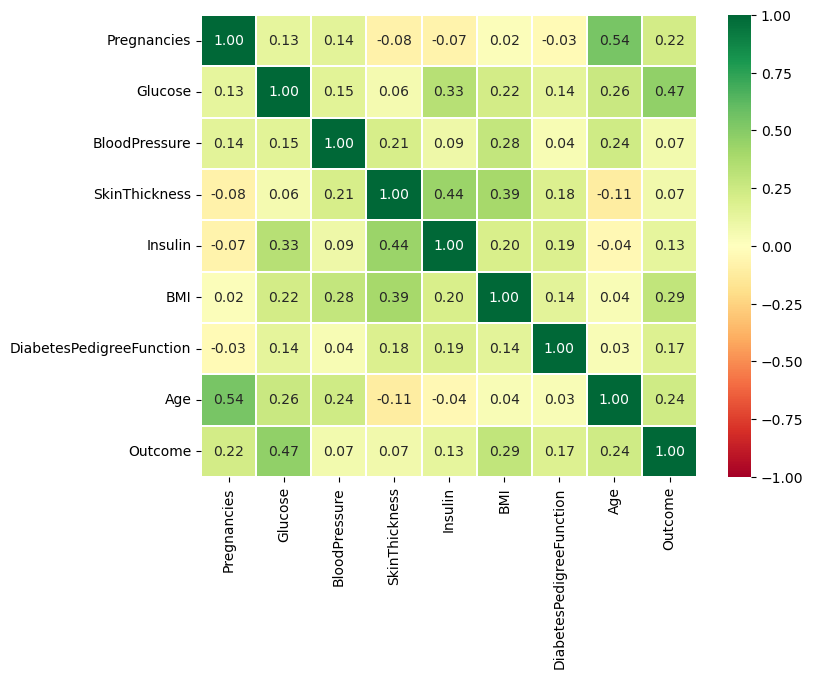

In [94]:
plt.figure(figsize = (8,6))
sns.heatmap(data = df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, 
            vmin=-1, vmax=1, fmt=".2f")

## Multivariate analysis 

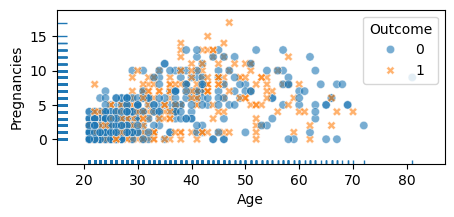

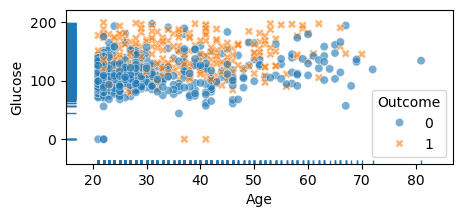

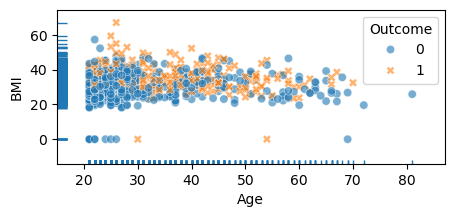

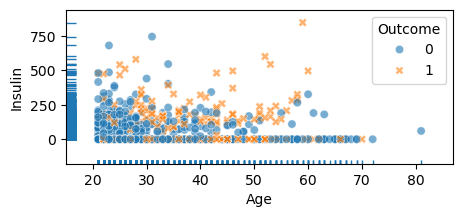

In [69]:
def plot_two_variables(x, y, data):
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=data, x=x, y=y, hue="Outcome", style="Outcome",alpha=.6)
    sns.rugplot(data=data, x=x, y=y)
    plt.show()

for feature in ["Pregnancies", "Glucose", "BMI","Insulin"]:
    plot_two_variables("Age", feature, df)

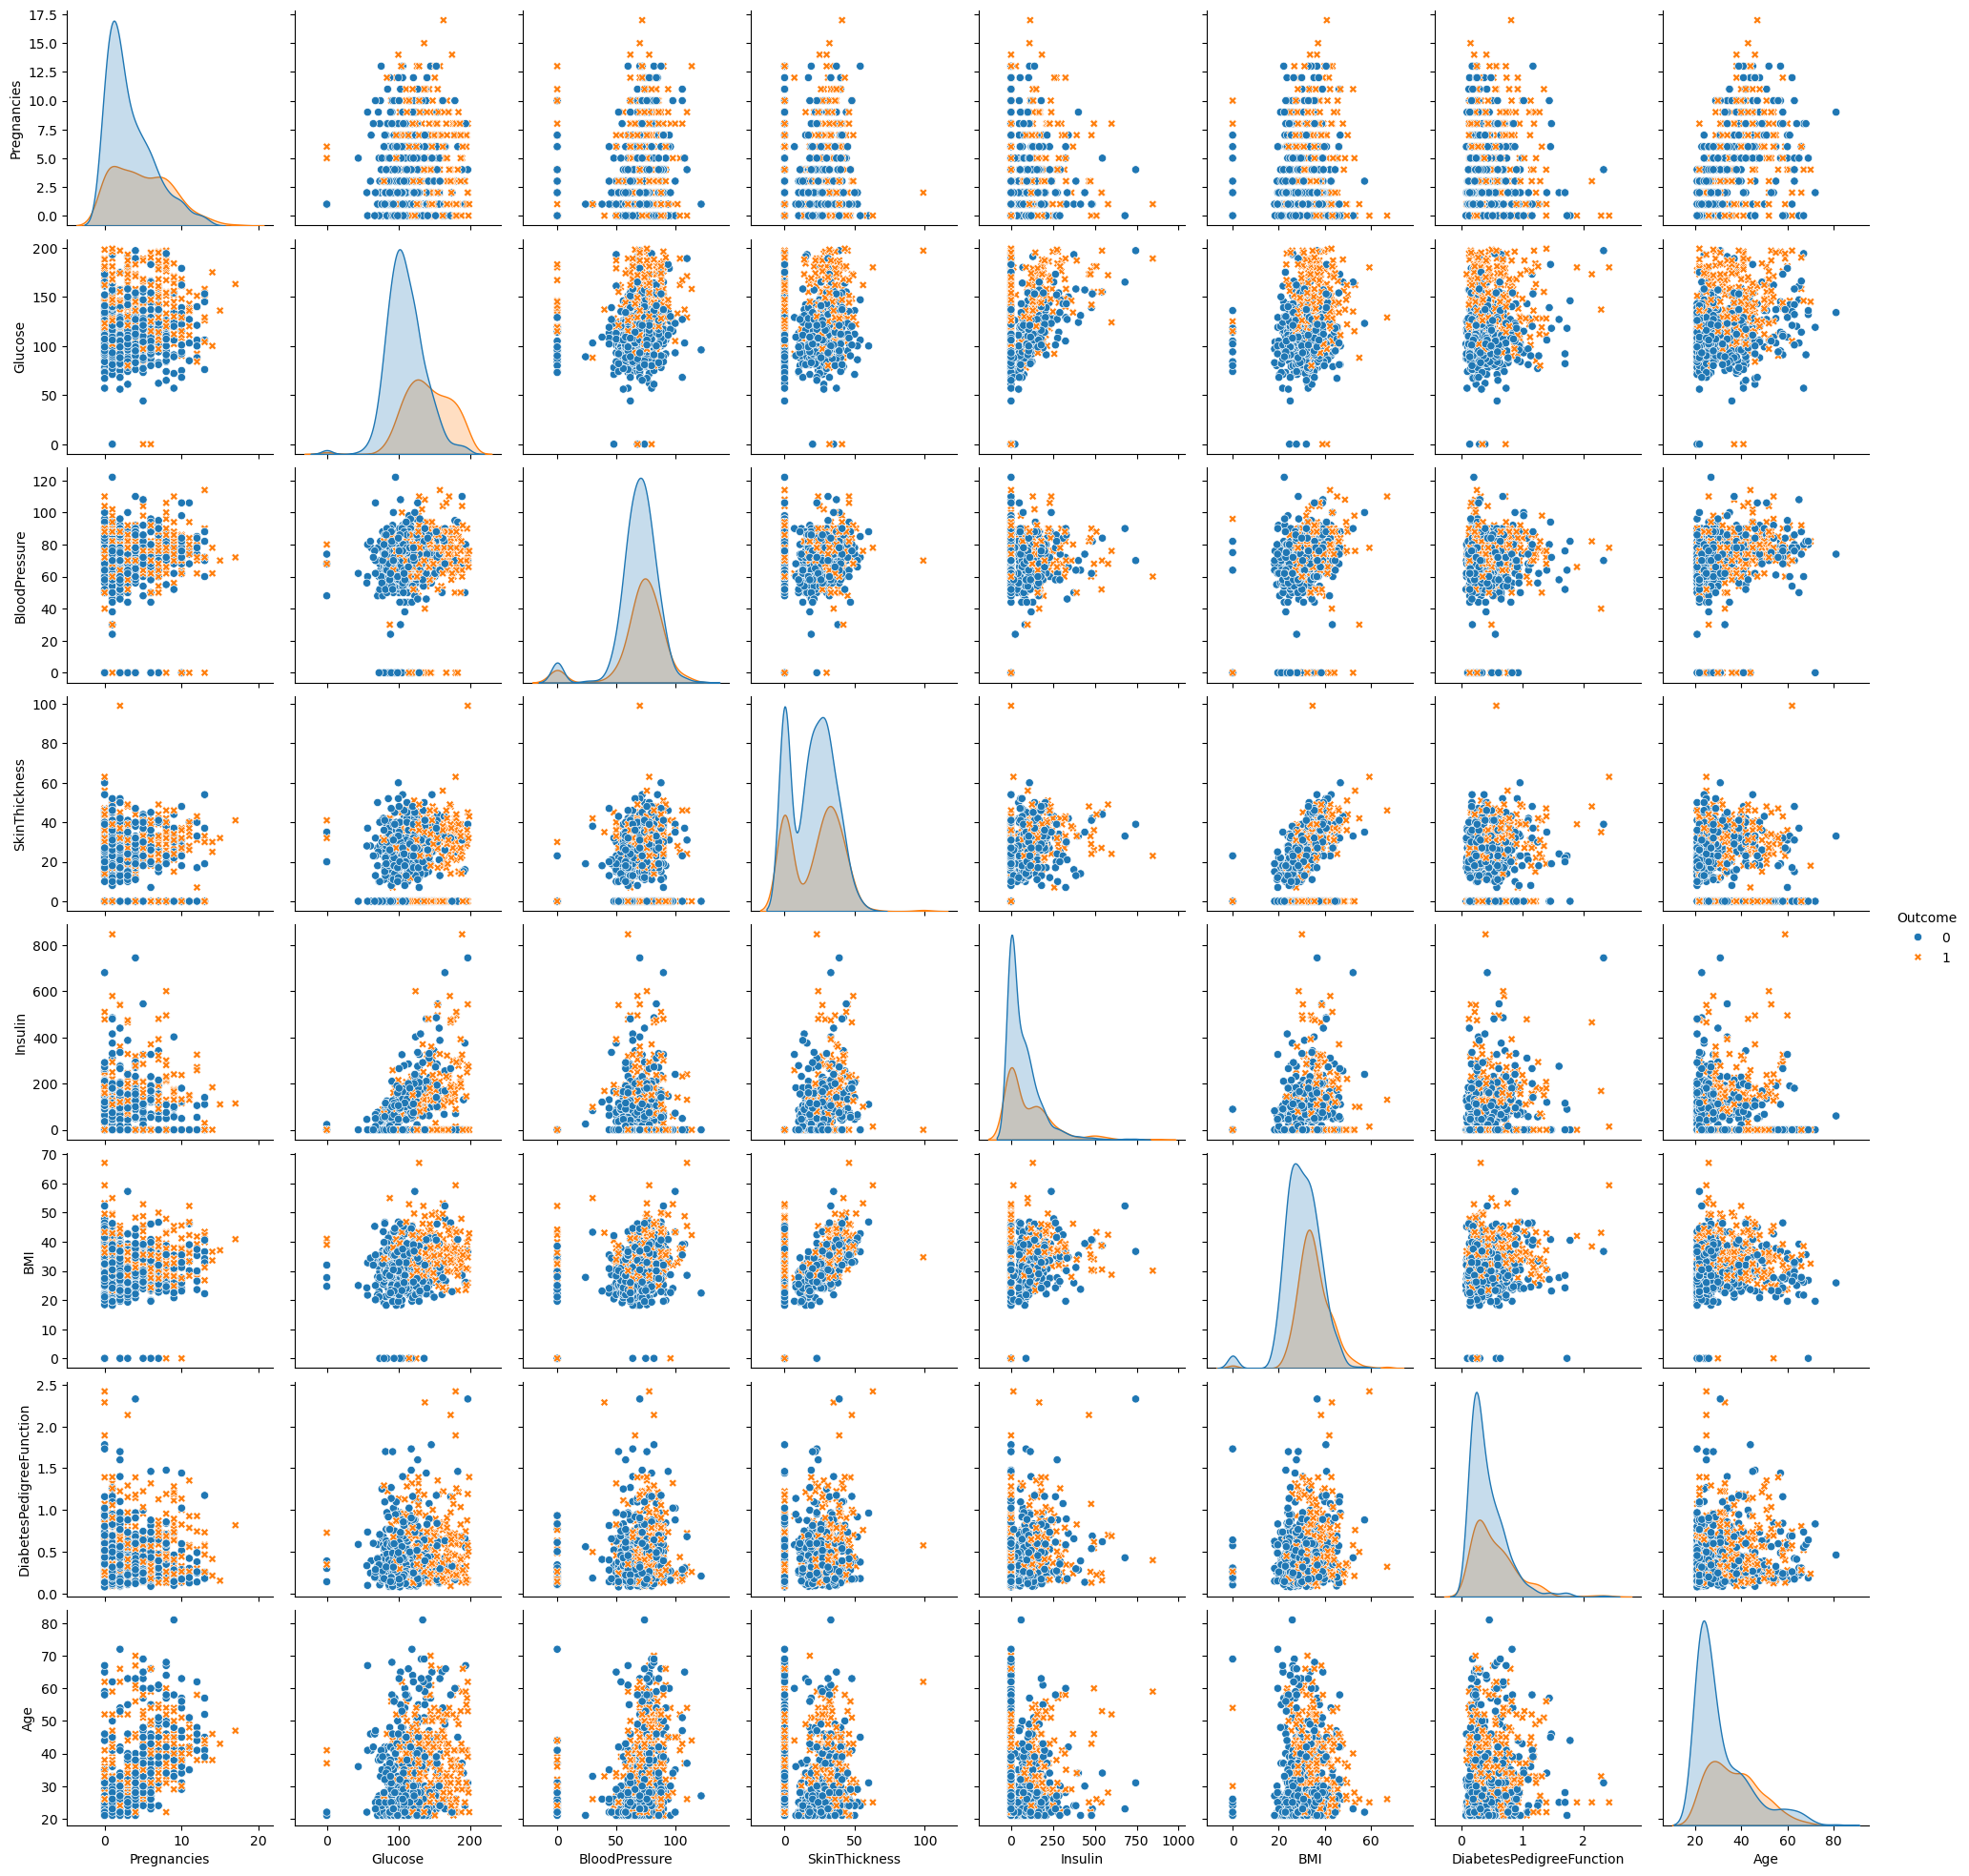

In [65]:
sns.pairplot(data=df,hue="Outcome",markers=["o","X"])

## Outliers

An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects.

<img width="300" alt="image" src="https://www.researchgate.net/publication/353410712/figure/fig1/AS:1048732418203648@1627048701501/Removal-of-outliers-using-IQR-method.png">

Inter-Quartile Range

```
IQR = Q3 - Q1
```

To detect the outliers using this method, we define a new range, let’s call it decision range, and any data point lying outside this range is considered as outlier and is accordingly dealt with. The range is as given below:

```
Lower Bound: (Q1 - 1.5 * IQR)
Upper Bound: (Q3 + 1.5 * IQR)
```
Any data point less than the Lower Bound or more than the Upper Bound is considered as an outlier.



In [66]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [89]:
def get_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    lower_bound  = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df_idx =  (df_in[col_name] < lower_bound) | (df_in[col_name] > upper_bound)
    return df_idx


outliers_ids=get_outliers(df, 'BMI' )

df[outliers_ids]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.00,0.23,54,1
49,7,105,0,0,0,0.00,0.30,24,0
60,2,84,0,0,0,0.00,0.30,21,0
81,2,74,0,0,0,0.00,0.10,22,0
120,0,162,76,56,100,53.20,0.76,25,1
125,1,88,30,42,99,55.00,0.50,26,1
145,0,102,75,23,0,0.00,0.57,21,0
177,0,129,110,46,130,67.10,0.32,26,1
193,11,135,0,0,0,52.30,0.58,40,1
247,0,165,90,33,680,52.30,0.43,23,0


In [85]:
df_extended = df.copy()
df_extended["outlier"] = False
for feature in cols:
    outliers_ids = get_outliers(df_extended, feature)
    df_extended.outlier[outliers_ids] = True



In [86]:
df_extended.loc[df_extended.outlier==True]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
4,0,137,40,35,168,43.10,2.29,33,1,True
7,10,115,0,0,0,35.30,0.13,29,0,True
8,2,197,70,45,543,30.50,0.16,53,1,True
9,8,125,96,0,0,0.00,0.23,54,1,True
12,10,139,80,0,0,27.10,1.44,57,0,True
...,...,...,...,...,...,...,...,...,...,...
706,10,115,0,0,0,0.00,0.26,30,1,True
707,2,127,46,21,335,34.40,0.18,22,0,True
710,3,158,64,13,387,31.20,0.29,24,0,True
715,7,187,50,33,392,33.90,0.83,34,1,True
